## K means Clustering


In [93]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [94]:
data = pd.read_csv("./customer-clustering/segmentation data.csv")

print(data.head())

          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  


In [95]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB
None


In [96]:
data.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

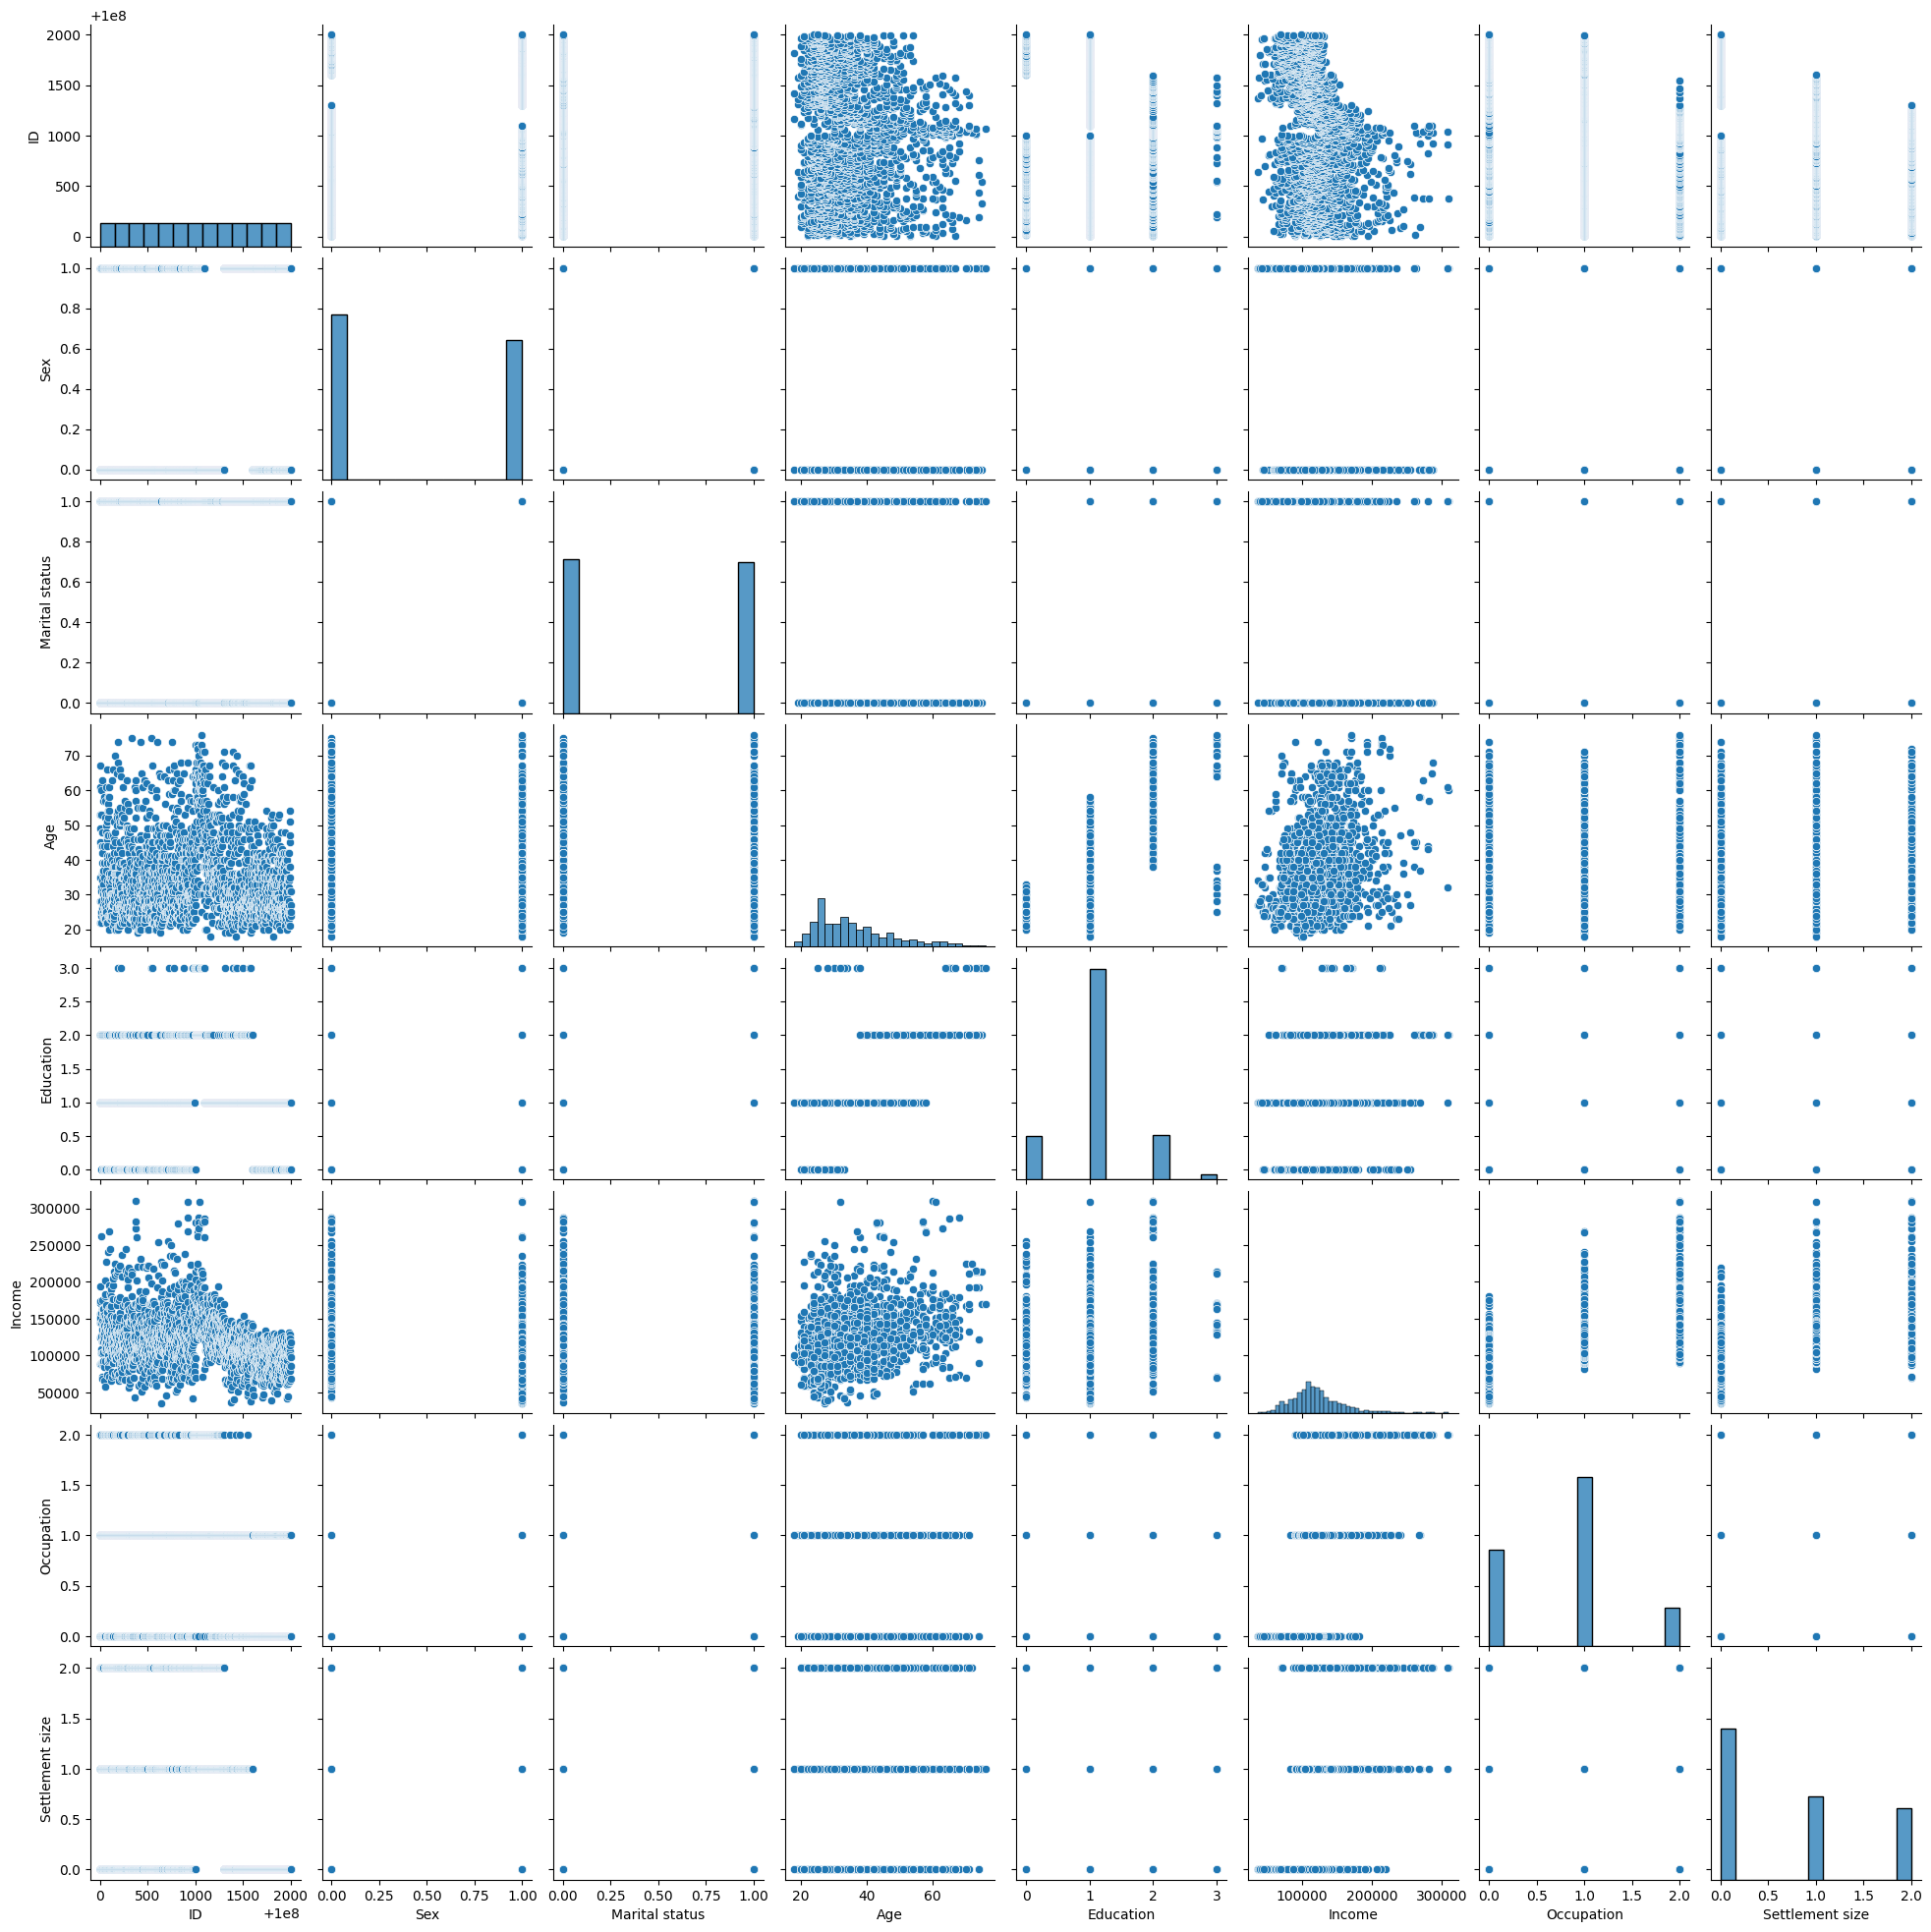

In [97]:
sns.pairplot(data)

In [98]:
# instantiate the scaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(data)

In [99]:
print(features_scaled)

[[-1.731185   -0.91739884 -0.99302433 ...  0.09752361  0.29682303
   1.552326  ]
 [-1.72945295  1.09003844  1.00702467 ...  0.78265438  0.29682303
   1.552326  ]
 [-1.7277209  -0.91739884 -0.99302433 ... -0.83320224 -1.26952539
  -0.90972951]
 ...
 [ 1.7277209  -0.91739884 -0.99302433 ... -0.90695688 -1.26952539
  -0.90972951]
 [ 1.72945295  1.09003844  1.00702467 ... -0.60332923 -1.26952539
  -0.90972951]
 [ 1.731185   -0.91739884 -0.99302433 ... -1.3789866  -1.26952539
  -0.90972951]]


In [100]:
# Elbow method:  is used to determine the best number of clusters for a dataset
k_range = range(1, 50)
inertia_values = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=20)
    kmeans.fit(features_scaled)
    inertia = kmeans.inertia_
    inertia_values.append(inertia)
    print(f'k: {k}, inertia: {inertia}')

k: 1, inertia: 16000.000000000002
k: 2, inertia: 12066.195753118402
k: 3, inertia: 10406.466743288853
k: 4, inertia: 8956.532999592344
k: 5, inertia: 7873.492381973383
k: 6, inertia: 7366.114612276876
k: 7, inertia: 6794.154666606119
k: 8, inertia: 6239.1607233953155
k: 9, inertia: 5892.886177741892
k: 10, inertia: 5614.7725888179175
k: 11, inertia: 5335.4413762790555
k: 12, inertia: 5119.344098256419
k: 13, inertia: 4957.816917977114
k: 14, inertia: 4661.093007060662
k: 15, inertia: 4452.44259541323
k: 16, inertia: 4306.025768376137
k: 17, inertia: 4184.756056255776
k: 18, inertia: 3933.8414353317794
k: 19, inertia: 3843.436310865999
k: 20, inertia: 3779.769717924826
k: 21, inertia: 3713.2746525244165
k: 22, inertia: 3547.7122911303213
k: 23, inertia: 3505.607028383907
k: 24, inertia: 3430.698075327974
k: 25, inertia: 3332.421783071292
k: 26, inertia: 3232.351768713641
k: 27, inertia: 3154.6154485511056
k: 28, inertia: 3103.5047857611235
k: 29, inertia: 3046.885547402699
k: 30, inerti

<Axes: >

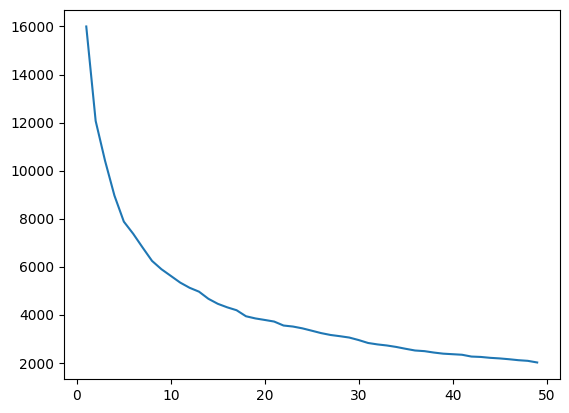

In [101]:
# plot the elbow curve
sns.lineplot(x=k_range, y=inertia_values)

In [102]:
# choosing 10 clusters
kmeans = KMeans(n_clusters=5, random_state=20)
clustered_data = kmeans.fit_predict(features_scaled)

In [103]:
print(clustered_data)

[3 4 2 ... 2 1 2]


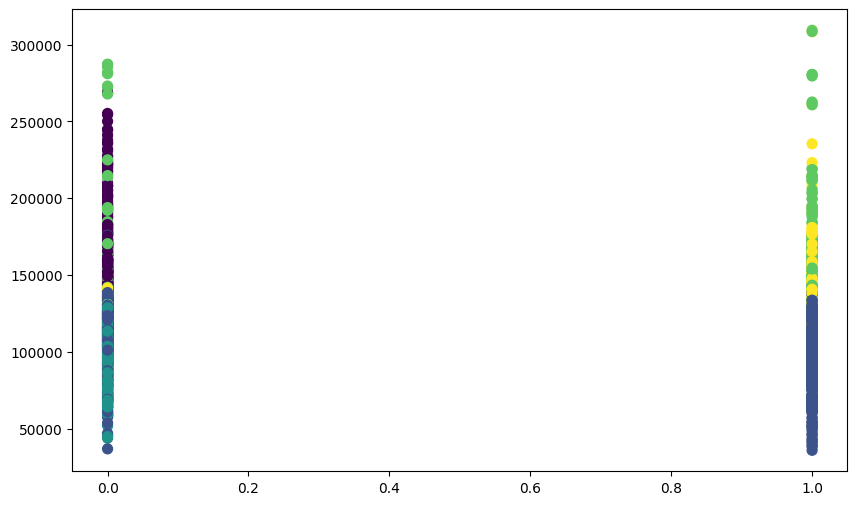

In [104]:
# visualize the clusters
plt.figure(figsize=(10, 6))

# Sex, Marital status,  Age,  Education,  Income,  Occupation, Settlement size
plt.scatter(data['Marital status'], data['Income'],
            c=clustered_data, cmap='viridis', s=50)

In [105]:
# find the centroids of the clusters
# These are the centroids in the scaled space
centroids = kmeans.cluster_centers_
centers_original = scaler.inverse_transform(centroids)
print(centroids)

[[-0.58962363 -0.91313676 -0.99302433  0.09293556 -0.60510787  0.55076663
   0.69921827  0.92505071]
 [ 0.95389108  0.97129908  0.38224042 -0.39563381 -0.02638103 -0.66166716
  -0.69336396 -0.87787297]
 [ 0.04669179 -0.91739884 -0.82308553 -0.0700522  -0.59747095 -0.62166556
  -0.8037159  -0.82524722]
 [-0.25649786  0.07537015  0.3815548   1.6911777   1.82263946  0.87868488
   0.38226021  0.35710996]
 [-0.44740325  0.40445176  1.00211055 -0.67167727 -0.0469823   0.11582843
   0.45846095  0.47555479]]


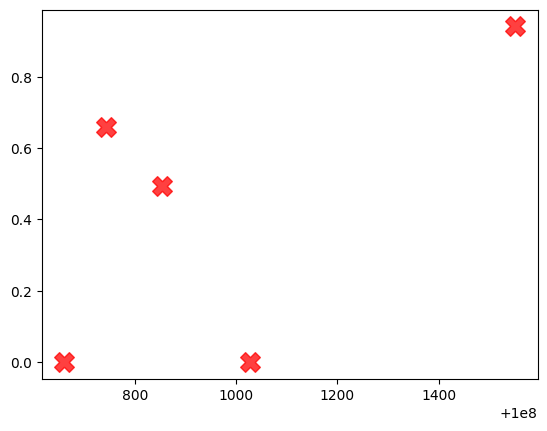

In [106]:
# plot the centroids
plt.scatter(centers_original[:, 0], centers_original[:,
            1], c='red', s=200, alpha=0.75, marker='X')

In [107]:
# which cluster does id = 100000004 belong to?
id = 100000015
customer = data[data['ID'] == id]
print(customer)

           ID  Sex  Marital status  Age  Education  Income  Occupation  \
14  100000015    1               1   28          1  102899           1   

    Settlement size  
14                1  


In [108]:
a = data.loc[data['ID'] == id, 'Cluster'] = clustered_data[data['ID'] == id]

In [109]:
print(a)

[4]


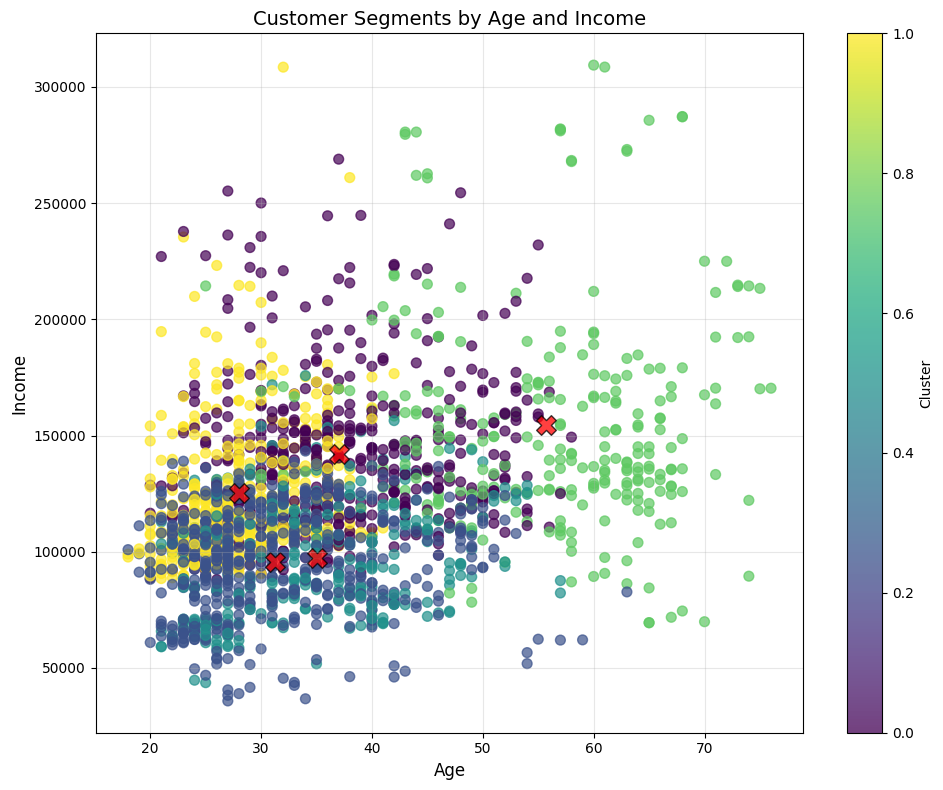

In [110]:
# plot the clusters with the centroids
plt.figure(figsize=(10, 8))  # Increase figure size for better visibility

# Plot data points colored by cluster assignment
plt.scatter(data['Age'], data['Income'],
            c=clustered_data, cmap='viridis', s=50, alpha=0.7)

# Plot centroids
plt.scatter(centers_original[:, 3], centers_original[:, 5],
            c='red', s=200, alpha=0.75, marker='X', edgecolors='black')

# Add labels and title
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income', fontsize=12)
plt.title('Customer Segments by Age and Income', fontsize=14)

# Add grid for better readability
plt.grid(alpha=0.3)

# Add a colorbar to show cluster assignments
cbar = plt.colorbar()
cbar.set_label('Cluster')

# Set axis limits if needed (adjust these values based on your data)
# plt.xlim([min(data['Age'])-5, max(data['Age'])+5])
# plt.ylim([min(data['Income'])-10000, max(data['Income'])+10000])

plt.tight_layout()
plt.show()

### Assignment Write a Blog on Kmeans Clustering.
